### The `validLib` parameter can be used to create a "conditional embedding", which specifies which data points are valid to use in the library construction. 

### The conditional embedding functionality is used to interactively test hypotheses about which regions of the constructed library attractor are useful for predicting a set of specified prediction points. 

### In the following toy example we will explore how different subsets of the constructed library are better suited for predicting different subsets of a target variable.

In [2]:
import numpy as np
from pyEDM import *

In [4]:
df = sampleData["circle"]

1. No filter applied to the library

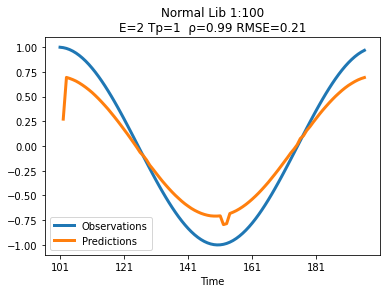

In [14]:
pred = Simplex( dataFrame = df, lib = "1 100", pred = "101 195", E = 2, Tp = 1, 
                          columns = 'x', target = 'y', validLib = None )
PlotObsPred( pred,  "Normal Lib 1:100", 2, 1 )

2. Only using the first 30 library points

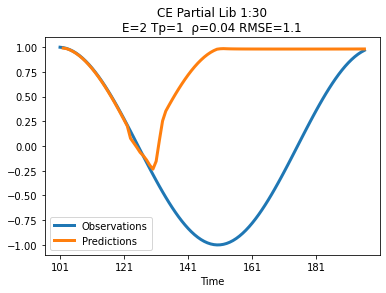

In [18]:
validLib = [True] * df.shape[0]      # 0:199 True
validLib[ 30:199 ] = [False] * 170   # 0:29  True; 30:199 False
pred = Simplex( dataFrame = df, lib = "1 100", pred = "101 195", E = 2, Tp = 1, 
                          columns = 'x', target = 'y', validLib = validLib )
PlotObsPred( pred, "CE Partial Lib 1:30", 2, 1 )

3. A more sophisticated filter of y < x and time > 10

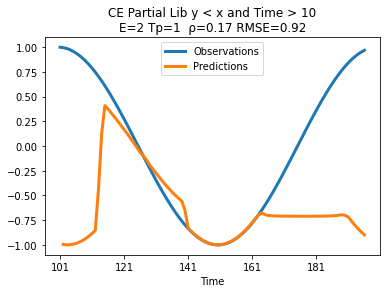

In [22]:
validLib = df.eval("y<x & Time>10")
pred = Simplex( dataFrame = df, lib = "1 100", pred = "101 195", E = 2, Tp = 1, 
                          columns = 'x', target = 'y', validLib = validLib )
PlotObsPred( pred, "CE Partial Lib y < x and Time > 10", 2, 1 )